In [264]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os 

# Nueva sección

In [265]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,date,year_week,product_number,reporterhq_id,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202119-6909,2021-05-15,202119,6909,93,Arale,21274,13.3,Premium,2.0,35.0
1,202120-6909,2021-05-22,202120,6909,93,Arale,21274,13.3,Premium,0.0,70.0
2,202121-6909,2021-05-29,202121,6909,93,Arale,21274,13.3,Premium,3.0,137.0
3,202122-6909,2021-06-05,202122,6909,93,Arale,21274,13.3,Premium,0.0,274.0
4,202123-6909,2021-06-12,202123,6909,93,Arale,21274,13.3,Premium,0.0,333.0


In [266]:
train_df.dtypes

id                  object
date                object
year_week            int64
product_number       int64
reporterhq_id        int64
prod_category       object
specs                int64
display_size       float64
segment             object
sales_units        float64
inventory_units    float64
dtype: object

In [267]:
train_df.isna().sum()

id                   0
date                 0
year_week            0
product_number       0
reporterhq_id        0
prod_category        0
specs                0
display_size         0
segment              0
sales_units        491
inventory_units    493
dtype: int64

In [268]:
subset = train_df[["id", "reporterhq_id"]]
dup = np.sum(subset.duplicated())
print(f"Existen {dup} columnas duplicadas")

Existen 0 columnas duplicadas


In [269]:
sales_unit_na= train_df["sales_units"].isna().sum()/train_df.shape[0]
inventory_unit_na= train_df["inventory_units"].isna().sum()/train_df.shape[0]

print(f"Un {sales_unit_na*100}% de sales_unit son nulos y {inventory_unit_na*100}% de inventory null")

Un 3.1771709589750223% de sales_unit son nulos y 3.190112592209137% de inventory null


In [270]:
non_na = train_df.dropna()
non_na.isna().sum()

id                 0
date               0
year_week          0
product_number     0
reporterhq_id      0
prod_category      0
specs              0
display_size       0
segment            0
sales_units        0
inventory_units    0
dtype: int64

In [271]:
print(non_na.shape, train_df.shape)

(14478, 11) (15454, 11)


In [272]:
non_na.describe()

,year_week,product_number,reporterhq_id,specs,display_size,sales_units,inventory_units
count,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000
mean,202240.919809,127111.665562,42.032739,112407.304669,15.159525,26.002625,71.749482
std,61.643873,77427.684132,34.864066,63754.223010,1.422528,29.398877,66.317573
min,201915.000000,6909.000000,3.000000,967.000000,11.000000,0.000000,0.000000
25%,202218.000000,58233.000000,15.000000,58987.000000,14.000000,3.000000,26.000000
50%,202239.000000,116466.000000,24.000000,109271.000000,15.600000,16.000000,56.000000
75%,202304.000000,196413.000000,78.000000,157621.000000,15.600000,38.000000,97.000000
max,202318.000000,247737.000000,96.000000,236915.000000,17.300000,186.000000,399.000000


In [273]:
non_na.shape

(14478, 11)

In [274]:
test = non_na
test = test.groupby("id")[["id", "inventory_units"]].sum()
new_df = non_na.drop_duplicates(subset=['id'],keep = 'first')
test.reset_index(inplace=True)

new_df = pd.merge(new_df, test, on = 'id', how = 'left')
new_df.loc[new_df['inventory_units_y'].notnull(), 'inventory_units'] = new_df['inventory_units_y']
new_df.drop(['inventory_units_y', 'inventory_units_x', 'reporterhq_id', 'year_week'], axis=1, inplace=True)
new_df.describe()

,product_number,specs,display_size,sales_units,inventory_units
count,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000
mean,126547.873906,110023.623972,15.157704,27.761204,137.733890
std,80560.155233,63865.270865,1.422126,29.988587,118.812817
min,6909.000000,967.000000,11.000000,0.000000,0.000000
25%,51324.000000,56086.000000,14.000000,4.000000,55.000000
50%,114492.000000,108304.000000,15.600000,19.000000,111.000000
75%,201348.000000,155687.000000,15.600000,41.000000,186.000000
max,247737.000000,236915.000000,17.300000,186.000000,889.000000


In [275]:
new_df["date"] = pd.to_datetime(new_df["date"])
new_df

,id,date,product_number,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202119-6909,2021-05-15,6909,Arale,21274,13.3,Premium,2.0,35.0
1,202120-6909,2021-05-22,6909,Arale,21274,13.3,Premium,0.0,70.0
2,202121-6909,2021-05-29,6909,Arale,21274,13.3,Premium,3.0,137.0
3,202122-6909,2021-06-05,6909,Arale,21274,13.3,Premium,0.0,274.0
4,202123-6909,2021-06-12,6909,Arale,21274,13.3,Premium,0.0,333.0
...,...,...,...,...,...,...,...,...,...
7537,202314-247737,2023-04-08,247737,Arale,10637,13.3,Premium,13.0,44.0
7538,202315-247737,2023-04-15,247737,Arale,10637,13.3,Premium,12.0,30.0
7539,202316-247737,2023-04-22,247737,Arale,10637,13.3,Premium,6.0,37.0
7540,202317-247737,2023-04-29,247737,Arale,10637,13.3,Premium,12.0,65.0


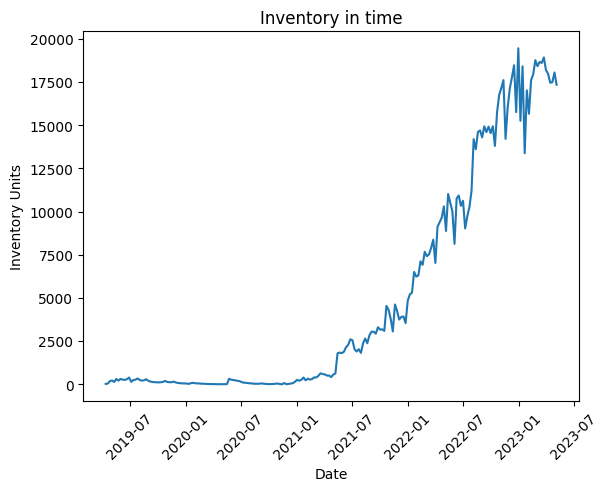

In [276]:
gd = new_df.groupby('date').sum(numeric_only = True)
plt.plot(gd.index, gd.inventory_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Inventory Units')
plt.title('Inventory in time')
plt.show()

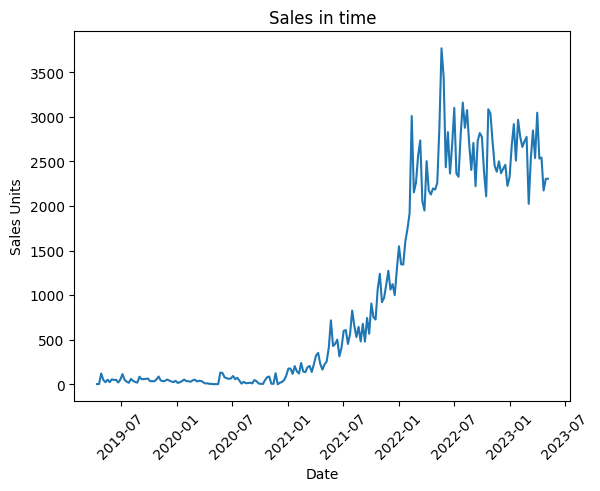

In [277]:
plt.plot(gd.index, gd.sales_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Sales Units')
plt.title('Sales in time')
plt.show()

In [278]:
for i, row in enumerate(new_df):
    date = row["date"]
    p_num = row["product_number"]
    if (new_df[i+1] - date).days 

,id,date,product_number,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202119-6909,2021-05-15,6909,Arale,21274,13.3,Premium,2.0,35.0
1,202120-6909,2021-05-22,6909,Arale,21274,13.3,Premium,0.0,70.0
2,202121-6909,2021-05-29,6909,Arale,21274,13.3,Premium,3.0,137.0
3,202122-6909,2021-06-05,6909,Arale,21274,13.3,Premium,0.0,274.0
4,202123-6909,2021-06-12,6909,Arale,21274,13.3,Premium,0.0,333.0
5,202124-6909,2021-06-19,6909,Arale,21274,13.3,Premium,2.0,349.0
6,202125-6909,2021-06-26,6909,Arale,21274,13.3,Premium,15.0,328.0
7,202126-6909,2021-07-03,6909,Arale,21274,13.3,Premium,49.0,288.0
8,202127-6909,2021-07-10,6909,Arale,21274,13.3,Premium,55.0,234.0
9,202129-6909,2021-07-24,6909,Arale,21274,13.3,Premium,91.0,62.0
